Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

Reading CSV file

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/NIIT-Batch/main/concrete.csv")

In [3]:
df.head(10)
# class 1 - diabetic
# class 0 - non diabetic

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [4]:
df.shape

(1030, 9)

In [5]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [8]:
df.describe(include = 'all')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
### checking any null values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

Handling duplicate datas

In [10]:
### check for duplicates
duplicate = df.duplicated()
duplicate.sum()

25

In [11]:
#df[duplicate]

In [12]:
df.drop_duplicates(inplace=True) #drop duplicate datas

Handling outliers

<AxesSubplot:>

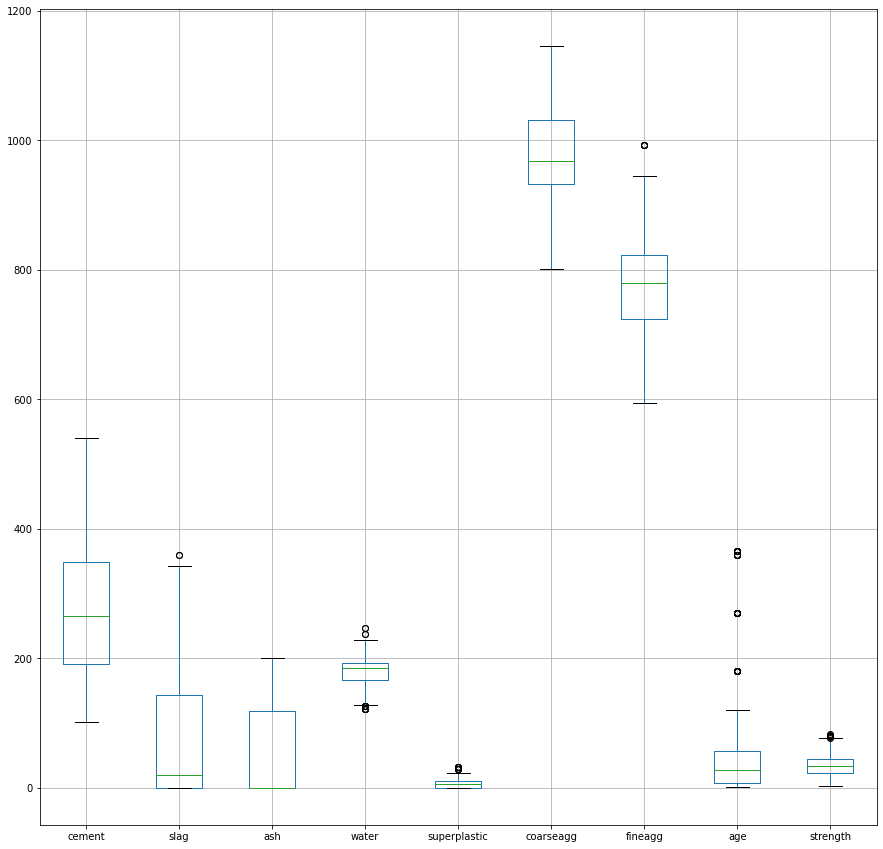

In [13]:
column=['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']
df.boxplot(column,figsize=(15,15))

In [14]:
### function to remove outliers
### function finds interquartile range and returns lower range and upper range above and below which datas are outliers (exceptions)
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [15]:
# lowleadtime,uppleadtime = remove_outlier(df["Preg"])
# df['Preg'] = np.where(df["Preg"]>uppleadtime,uppleadtime,df["Preg"])

In [16]:
### checking outliers again
# df.boxplot(column='Preg')

In [17]:
# column=['Plas','Pres','skin','test','mass','pedi','age','class']
# df.boxplot(column,figsize=(15,15))

In [18]:
### function replace outliers with upper or lower limit for given column name
def col_out_rmvr(column_name):
    lowleadtime,uppleadtime = remove_outlier(df[column_name])
    df[column_name] = np.where(df[column_name]>uppleadtime,uppleadtime,df[column_name])
    df[column_name] = np.where(df[column_name]<lowleadtime,lowleadtime,df[column_name])

In [19]:
for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']:
    col_out_rmvr(i)

<AxesSubplot:>

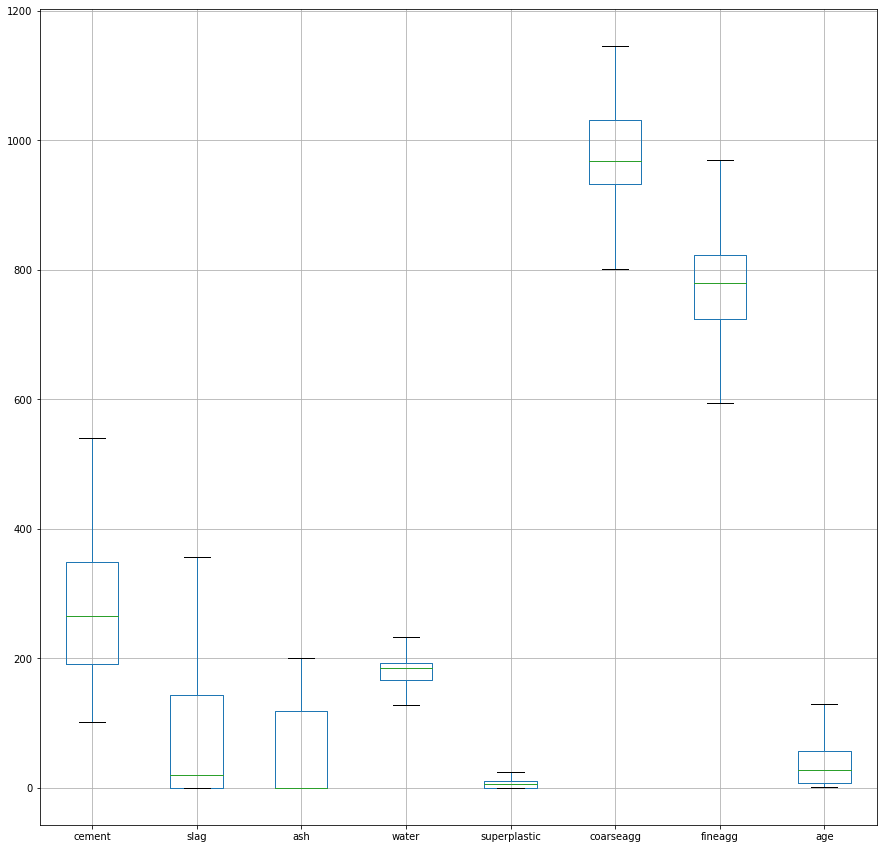

In [20]:
column=['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']
df.boxplot(column,figsize=(15,15))

In [21]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.037214,55.536318,182.066816,5.981493,974.376816,772.571095,38.076119,35.250378
std,104.344261,86.149994,64.207969,21.158645,5.724463,77.579667,80.035934,35.862549,16.284815
min,102.000000,0.000000,0.000000,127.150000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,356.250000,200.100000,232.350000,25.000000,1145.000000,969.050000,129.500000,82.600000


Splittin data    x - dependent variable; y - independent variables

In [22]:
X = df.drop(['strength'],axis=1)
Y = df[['strength']]

Splitting data for training and testing

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30,random_state=1)

Linear Regression

In [24]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)

LinearRegression()

In [25]:
model_1.score(X_train,Y_train)

0.7337107351417851

In [26]:
model_1.score(X_test,Y_test)

0.6770541518175142

Polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

model2 = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = model2.fit_transform(X_train)
X_test2 = model2.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2,Y_train)

LinearRegression()

In [28]:
poly_clf.score(X_train2, Y_train)

0.8030284152004661

In [29]:
poly_clf.score(X_test2, Y_test)

0.738125101835548

DecisionTree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
model_3 = DecisionTreeRegressor()
model_3.fit(X_train, Y_train)

DecisionTreeRegressor()

In [32]:
model_3.score(X_train,Y_train)

0.9956764145576433

In [33]:
model_3.score(X_test,Y_test)

0.7748590535944923

KNeighbors Regressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
model_4 = KNeighborsRegressor()
model_4.fit(X_train, Y_train)

KNeighborsRegressor()

In [36]:
model_4.score(X_train,Y_train)

0.7937312022090213

In [37]:
model_4.score(X_test,Y_test)

0.5935308519234096

SV Regresser

In [38]:
from sklearn.svm import SVR

In [39]:
model_5 = SVR()
model_5.fit(X_train, Y_train)

SVR()

In [40]:
model_5.score(X_train,Y_train)

0.24907707853713523

In [41]:
model_5.score(X_test,Y_test)

0.1969506874747543

Bagging Regressor

In [42]:
from sklearn.ensemble import BaggingRegressor

In [43]:
model_6 = BaggingRegressor()
model_6.fit(X_train, Y_train)

BaggingRegressor()

In [44]:
model_6.score(X_train,Y_train)

0.9760261591465458

In [45]:
model_6.score(X_test,Y_test)

0.8670514983675066

AdaBoost Regressor

In [46]:
from sklearn.ensemble import AdaBoostRegressor

In [47]:
model_7 = AdaBoostRegressor()
model_7.fit(X_train,Y_train)

AdaBoostRegressor()

In [48]:
model_7.score(X_train,Y_train)

0.8210688445341664

In [49]:
model_7.score(X_test,Y_test)

0.7696223031290615

Gradient Boosting Regressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
model_8 = GradientBoostingRegressor(n_estimators=500)
model_8.fit(X_train,Y_train)

GradientBoostingRegressor(n_estimators=500)

In [52]:
model_8.score(X_train,Y_train)

0.9853652240067503

In [53]:
model_8.score(X_test,Y_test)

0.9317170971107704

RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
model_9 = RandomForestRegressor()
model_9.fit(X_train,Y_train)

RandomForestRegressor()

In [56]:
model_9.score(X_train,Y_train)

0.9845378277444943

In [57]:
model_9.score(X_test,Y_test)

0.895605322305109

3rd degree polynomial

In [58]:
model_10 = PolynomialFeatures(degree=3, interaction_only=True)
X_train3 = model_10.fit_transform(X_train)
X_test3 = model_10.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train3,Y_train)


print(poly_clf.score(X_train3, Y_train))

0.8460159633027488


In [59]:
print(poly_clf.score(X_test3, Y_test))

0.7365972282982277
